# Lösen einer Gewöhnlichen Differential Gleichung (GDL)

Einer der einfachsten Methoden um eine *GDL* zu lösen ist das sogenannte **Euler-vorwärts-Verfahren** oder **explicite Euler-Verfahren**. Dabei benutzen wir die Informationen aus dem aktuellen Zeitschritt um die Informationen des neuen Zeitschrittes zu berechnen. Diese Verfahren wollen wir an einem bestimmten ein-dimesionalem Problem anwenden. 

## Das Problem

Eine, im 1-D Raum, relative einfache *GDL* ist the Partikelpfadgleichung, gegeben durch:

$$
\frac{\partial{x}}{\partial{t}} = f(x) = v_{x},
$$

wobei $x$ die Position des Partikels, $t$ die Zeit und $v_{x}$ die horizontale Geschwindigkeit darstellt. Die Gleichung beschreibt die Änderung der Position eines Partikels *P* mit der Zeit unter der Annahme einer konstanten Geschwindigkeit. 

Bevor wir versuchen das Problem numerisch zu lösen, lasst uns erst einmal die Anfangssituation darstellen. Dazu benötigen wir die folgenden Module in Julia (```Plots```):

In [1]:
using Plots

Nun definieren wir die Konstanten für unser Problem (Geometrie, Zeit, Physik): 

In [2]:
# Plot Parameter -------------------------------------------------------- %
#   Definiert ob die Abbildung als Animation gespeichert wird, 
#   0 - nein, 1 - ja
save_fig    =   1    
# ----------------------------------------------------------------------- %
# Geometrische Konstanten ----------------------------------------------- %
xmin        =   -10.0                               # Minimum [ m ]
xmax        =   10.0                               # Maximum [ m ]
# ----------------------------------------------------------------------- %
# Zeit Parameter -------------------------------------------------------- %
tmin        =   0.0                             # Anfangszeit [ s ]
tmax        =   60                               # Maximale Zeit [ s ]
dt          =   0.5                               # Zeitschrittlänge [ s ]
nt          =   Int((tmax - tmin) / dt) + 1     # Anzahl der Zeitschritte 
Zeit        =   0.0
# ----------------------------------------------------------------------- %
# Anfangswert ----------------------------------------------------------- %
vx          =   0.5                               # Geschwindigkeit [ m/s ]
Px          =   0                               # Anfangsposition 
# ----------------------------------------------------------------------- %

0

### Visualizierung
Um unsere Abbildungen in einer Animation speichern zu können müssen wir den Ordner und den Namen der Datei festlegen: 

In [3]:
# Animationssettings ---------------------------------------------------- %
path        =   string("./Results/")
anim        =   Plots.Animation(path, String[] )
filename    =   "01_1D_Euler"

"01_1D_Euler"

Jetzt wollen wir das Partikel an seiner Anfangsposition darstellen (```scatter,annotate ```): 

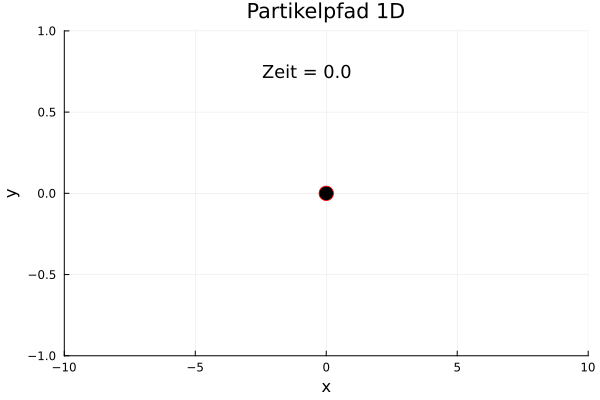

In [4]:
p = scatter([Px], [0], label="", xlims=(xmin, xmax), ylims=(-1, 1),
            xlabel="x", ylabel="y", title="Partikelpfad 1D",            
            marker=:circle, markersize=8,
            markercolor=:black, markerstrokecolor=:red)    
annotate!(p, -0.75, 0.75, text("Zeit = $Zeit", :black, 12)) 
display(p)

Als nächstes wollten wir die *GDL* lösen.

## Die Lösung

Die partielle Differentialgleichung können wir, wie in der Vorlesung besprochen, durch die Schreibweise der *finiten Differenzen* approximieren. Dabei verwenden wir eine Approximation **vorwärts** in der Zeit und **vorwärts** im Raum. Die Partikelpfadgleichung ist dann gegeben durch: 

$$
\frac{\Delta{x}}{\Delta{t}} = v_x, 
$$

wobei $\Delta{}$ das totale oder absolute Differential darstellt und ausgeschrieben gegeben durch:  

$$
\frac{x_2-x_1}{t_2-t_1}=v_x, 
$$

wobei $x_1$ und $x_2$ die Position des Partikel zum aktuellen und nächsten Zeitschritt, und $t_1$ und $t_2$ die Zeit zum aktuellen und nächsten Zeitschritt darstellt. 

Nun können wir die Gleichung nach der Unbekannten $x_2$ auflösen: 

$$
x_2 = v_x \Delta{t} + x_1. 
$$

Diese Gleichung müssen wir nun für jeden Zeitschritt lösen und können dann die Lösung unseres Problems, die Position des Partikels mit der Zeit, für jeden Zeitschritt graphisch darstellen. Dazu müssen wir diese Schritte nacheinander in einer Schleife über die Zeit numerisch berechnen und darstellen. 

In [5]:
# Numerische Loesung der GDL -------------------------------------------- %
for it = 1:nt
    Zeit = (it - 1) * dt
    println("Time: ", Zeit)
    if it > 1
        Px = vx * dt + Px
    end
    if Px > xmax
        Px = Px - xmax + xmin
    end
    if Px < xmin
        Px = Px + xmax - xmin
    end    
    p = scatter([Px], [0], label="", xlims=(xmin, xmax), ylims=(-1, 1),
            xlabel="x", ylabel="y", title="Partikelpfad 1D",            
            marker=:circle, markersize=8,
            markercolor=:black, markerstrokecolor=:red)    
    annotate!(p, -0.75, 0.75, text("Zeit = $Zeit", :black, 12)) 

    Plots.frame(anim)

end

Time: 0.0
Time: 0.5
Time: 1.0
Time: 1.5
Time: 2.0
Time: 2.5
Time: 3.0
Time: 3.5
Time: 4.0
Time: 4.5
Time: 5.0
Time: 5.5
Time: 6.0
Time: 6.5
Time: 7.0
Time: 7.5
Time: 8.0
Time: 8.5
Time: 9.0
Time: 9.5
Time: 10.0
Time: 10.5
Time: 11.0
Time: 11.5
Time: 12.0
Time: 12.5
Time: 13.0
Time: 13.5
Time: 14.0
Time: 14.5
Time: 15.0
Time: 15.5
Time: 16.0
Time: 16.5
Time: 17.0
Time: 17.5
Time: 18.0
Time: 18.5
Time: 19.0
Time: 19.5
Time: 20.0
Time: 20.5
Time: 21.0
Time: 21.5
Time: 22.0
Time: 22.5
Time: 23.0
Time: 23.5
Time: 24.0
Time: 24.5
Time: 25.0
Time: 25.5
Time: 26.0
Time: 26.5
Time: 27.0
Time: 27.5
Time: 28.0
Time: 28.5
Time: 29.0
Time: 29.5
Time: 30.0
Time: 30.5
Time: 31.0
Time: 31.5
Time: 32.0
Time: 32.5
Time: 33.0
Time: 33.5
Time: 34.0
Time: 34.5
Time: 35.0
Time: 35.5
Time: 36.0
Time: 36.5
Time: 37.0
Time: 37.5
Time: 38.0
Time: 38.5
Time: 39.0
Time: 39.5
Time: 40.0
Time: 40.5
Time: 41.0
Time: 41.5
Time: 42.0
Time: 42.5
Time: 43.0
Time: 43.5
Time: 44.0
Time: 44.5
Time: 45.0
Time: 45.5
Time: 46

Um die Abbildungen in einer Gifanimation zu speichern müssen wir noch das entsprechende Gif erzeugen: 

In [6]:
if save_fig == 1
    # Write the frames to a GIF file
    Plots.gif(anim, string( path, filename, ".gif" ), fps = 15)
end
foreach(rm, filter(endswith(".png"), readdir(path,join=true)))

┌ Info: Saved animation to /home/lufuchs/progs/src/julia/scripts/GeoModBox/exercises/master/Results/01_1D_Euler.gif
└ @ Plots /home/lufuchs/.julia/packages/Plots/du2dt/src/animation.jl:156
